# TASK 1

##### Using PySpark RDD

### Loading the Dataset

In [0]:
from pyspark import SparkContext
import csv
from io import StringIO
from datetime import datetime
import matplotlib.pyplot as plt

# I'm using 'sc' as SparkContext
sc = SparkContext.getOrCreate()

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1712156823000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1714806959000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1712694645000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificationTime=1714806950000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.zip', name='clinicaltrial_2021.zip', size=11508457, modificationTime=1712694645000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714806939000),
 FileInfo(path='dbfs:/FileStore/tables/clini

In [0]:
# Copying clinicaltrials from DBFS to local /tmp/
dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/clinicaltrial_2023.zip")

dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/clinicaltrial_2021.zip")

dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/clinicaltrial_2020.zip")

# Copying pharma.zip from DBFS to local /tmp/
dbutils.fs.cp("dbfs:/FileStore/tables/pharma.zip", "file:/tmp/pharma.zip")


Out[3]: True

In [0]:
%sh
ls /tmp

Rserv
Rtmp9CdY97
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-c5f3d458fd73423cb4de42e066a0f3b1-apache2.service-QUoyxi
systemd-private-c5f3d458fd73423cb4de42e066a0f3b1-ntp.service-Lo8HDf
systemd-private-c5f3d458fd73423cb4de42e066a0f3b1-systemd-logind.service-ok7bZi
systemd-private-c5f3d458fd73423cb4de42e066a0f3b1-systemd-resolved.service-IBmE9e
tmp.NRput3mvn3


In [0]:
%sh
# Unziping clinicaltrials zip file to /tmp/
unzip /tmp/clinicaltrial_2023.zip -d /tmp
unzip /tmp/clinicaltrial_2021.zip -d /tmp
unzip /tmp/clinicaltrial_2020.zip -d /tmp

# Unziping pharma zip file to /tmp/
unzip /tmp/pharma.zip -d /tmp

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# Move clinicaltrials .csv from local /tmp/ to DBFS location
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "dbfs:/FileStore/tables/clinicaltrial_2023.csv")

dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "dbfs:/FileStore/tables/clinicaltrial_2021.csv")

dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "dbfs:/FileStore/tables/clinicaltrial_2020.csv")

# Move pharma.csv from local /tmp/ to DBFS location
dbutils.fs.mv("file:/tmp/pharma.csv", "dbfs:/FileStore/tables/pharma.csv")

Out[6]: True

In [0]:
dbutils.fs.head("/FileStore/tables/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]
Out[7]: '"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-

In [0]:
dbutils.fs.head("/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]
Out[8]: '"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to ind

In [0]:
Clinical_rdd_2023 = sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")
Clinical_rdd_2023.take(2)

Out[9]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
Pharma_rdd = sc.textFile("/FileStore/tables/pharma.csv")
Pharma_rdd.take(2)

Out[10]: ['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the c

### Cleaning the data

In [0]:
# Replacing any occurrence of consecutive commas with a single comma
Cleaned_Clinical_rdd_2023 = Clinical_rdd_2023.map(lambda line: line.replace(',,', ''))
Cleaned_Clinical_rdd_2023.take(2)

Out[11]: ['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion"',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",']

In [0]:
# Removing all double quotation marks from each line in the RDD.
Cleaned_Clinical_rdd_2023 = Cleaned_Clinical_rdd_2023.map(lambda line: line.replace('"', ''))
Cleaned_Clinical_rdd_2023.take(2)

Out[12]: ['Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion',
 "NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28,"]

In [0]:
# Splitting the tab characters to structure the dataset into columns
Cleaned_Clinical_rdd_2023 = Cleaned_Clinical_rdd_2023.map(lambda x: x.split('\t'))
Cleaned_Clinical_rdd_2023.take(2)

Out[13]: [['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28,']]

In [0]:
# Retrieving the first row as the header for column names
header_Clinical_rdd_2023 = Cleaned_Clinical_rdd_2023.first()   # This holds the header

# Filtering out the header row from the RDD
Cleaned_Clinical_rdd_2023 = Cleaned_Clinical_rdd_2023.filter(lambda row: row != header_Clinical_rdd_2023)

In [0]:
# Cleaning Pharma
# Removing all double quotes from each line
Cleaned_Pharma_rdd = Pharma_rdd.map(lambda line: line.replace('"', ''))
Cleaned_Pharma_rdd.take(2)

Out[15]: ['Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes',
 "Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice

In [0]:
# Splitting each line
Cleaned_Pharma_rdd = Pharma_rdd.map(lambda row: next(csv.reader(StringIO(row))))

#Remove unnecessary characters
Cleaned_Pharma_rdd = Cleaned_Pharma_rdd.map(lambda row: [item.strip('"') for item in row])

Cleaned_Pharma_rdd.take(5)

Out[16]: [['Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'],
 ['Abbott Laboratories',
  'Abbott Laboratories',
  '$5,475,000',
  '$0',
  '$5,475,000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $

In [0]:
# Retrieving the first row as the header for column names (for Pharma)
header_Pharma_rdd = Cleaned_Pharma_rdd.first()


Cleaned_Pharma_rdd = Cleaned_Pharma_rdd.filter(lambda row: row != header_Pharma_rdd)

In [0]:
# Treating missing values
# Replace missing values with 'NA' in Clinicaltrials
Cleaned_Clinical_rdd_2023 = Cleaned_Clinical_rdd_2023.map(lambda row: ['NA' if value is None or value == '' else value for value in row])

# Replace missing values with 'NA' in Pharma
Cleaned_Pharma_rdd = Cleaned_Pharma_rdd.map(lambda row: ['NA' if value is None or value == '' else value for value in row])

### Questions

#### No. 1

In [0]:
# Counting and printing the total number of distinct studies for 2023.
distinct_studies_2023 = Cleaned_Clinical_rdd_2023.map(lambda row: row[0]).distinct().count()
print(distinct_studies_2023)

483422


#### No. 2

In [0]:
# Analyzing the frequency of study types in the.
type_column_index = header_Clinical_rdd_2023.index('Type')

# Filter to include only rows with valid type column index
types_rdd = Cleaned_Clinical_rdd_2023.filter(lambda row: len(row) > type_column_index).map(lambda row: row[type_column_index])

# Map each study type to a tuple
type_counts = types_rdd.map(lambda type: (type, 1))

# Count of occurrences for each type
types_frequency = type_counts.reduceByKey(lambda x,y: x + y)

# Sort the study types by their frequency in descending order
type_frequency_sorted = types_frequency.sortBy(lambda x: x[1], ascending=False)

# Printing the results
answer = type_frequency_sorted.collect()

for type, frequency in answer:
    print(f'{type}: {frequency}')

INTERVENTIONAL: 371382
OBSERVATIONAL: 110221
EXPANDED_ACCESS: 928
NA: 889


#### No. 3

In [0]:
# Find the index of the 'Conditions' column
conditions_column_index = header_Clinical_rdd_2023.index('Conditions')

# Mapping each row, counting each condition, sorting by frequency in descending order, and take the top 5
top_conditions_2023 = Cleaned_Clinical_rdd_2023 \
    .map(lambda row: row[conditions_column_index]) \
    .map(lambda condition: (condition, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda pair: pair[1], ascending=False) \
    .take(5)

# Print the top 5 conditions and their frequencies
print('Top 5 Conditions:')
print(f'{"Condition":<25} | {"Frequency"}')
print('-' * 45)

for condition, frequency in top_conditions_2023:
    print(f'{condition:<25} | {frequency}')

Top 5 Conditions:
Condition                 | Frequency
---------------------------------------------
Healthy                   | 7997
Breast Cancer             | 4556
Prostate Cancer           | 2650
Asthma                    | 2309
Obesity                   | 2284


#### No. 4

In [0]:
# List of all possible pharmaceutical companies
pharma_companies_list = Cleaned_Pharma_rdd.map(lambda x: x[header_Pharma_rdd.index('Parent_Company')]).distinct().collect()
print(pharma_companies_list[:])

# Broadcast the list
pharma_companies_broadcast = sc.broadcast(pharma_companies_list)

['Abbott Laboratories', 'AbbVie', 'Amneal Pharmaceuticals', 'AstraZeneca', 'Sanofi', 'AVEO Pharmaceuticals', 'Bausch Health', 'GlaxoSmithKline', 'Teva Pharmaceutical Industries', 'Merck', 'Novartis', 'Daiichi Sankyo', 'Eisai', 'KV Pharmaceutical', 'Parexel International', 'Novo Holdings A/S', 'Sun Pharmaceuticals', 'Regeneron Pharmaceuticals', 'Takeda Pharmaceutical', 'Cambrex', 'Lannett Co.', 'CSL Limited', 'Akorn Inc.', 'Wockhardt Limited', 'Anika Therapeutics', 'Purdue Pharma', 'Arbor Pharmaceuticals', 'Aceto', 'Apotex Corp.', 'Biocryst Pharmaceuticals', 'Elanco Animal Health', 'Curia Inc.', 'Johnson & Johnson', 'Pfizer', 'Bristol-Myers Squibb', 'Amgen', 'Astellas Pharma', 'Biogen Idec', 'Boehringer Ingelheim', 'Eli Lilly', 'Alcami', 'Currax Pharmaceuticals', 'Endo International', 'Viatris', 'Perrigo', 'Merck KGaA (EMD)', 'Zoetis', 'SELLAS Life Sciences Group', 'Roche', 'Gilead Sciences', 'Clovis Oncology', 'Mallinckrodt', 'Otsuka Pharmaceutical', 'Phibro Animal Health', 'Hikma Phar

In [0]:
# Filter Non-pharmaceutical sponsors
non_pharma_clinical_rdd = Cleaned_Clinical_rdd_2023.filter(lambda row: row[6] not in pharma_companies_broadcast.value)

# Count the clinical trials sponsored by each non-pharmaceutical sponsor
sponsors_count_rdd = non_pharma_clinical_rdd.map(lambda row: (row[6], 1)).reduceByKey(lambda x, y: x + y)
sponsors_count_sorted_rdd = sponsors_count_rdd.sortBy(lambda x: x[1], ascending=False)

# Extracting and Display of Top 10 Sponsors
top_10_sponsors = sponsors_count_sorted_rdd.take(10)

print("Top 10 Sponsors (None Pharmaceutical Companies) & Number of Clinical Trials They Sponsored:")
for sponsor, count in top_10_sponsors:
    print(f"Sponsor: {sponsor} - Number of Clinical Trials Sponsored: {count}")

Top 10 Sponsors (None Pharmaceutical Companies) & Number of Clinical Trials They Sponsored:
Sponsor: National Cancer Institute (NCI) - Number of Clinical Trials Sponsored: 3410
Sponsor: Assiut University - Number of Clinical Trials Sponsored: 3335
Sponsor: Cairo University - Number of Clinical Trials Sponsored: 3023
Sponsor: Assistance Publique - Hôpitaux de Paris - Number of Clinical Trials Sponsored: 2951
Sponsor: Mayo Clinic - Number of Clinical Trials Sponsored: 2766
Sponsor: M.D. Anderson Cancer Center - Number of Clinical Trials Sponsored: 2702
Sponsor: Novartis Pharmaceuticals - Number of Clinical Trials Sponsored: 2393
Sponsor: National Institute of Allergy and Infectious Diseases (NIAID) - Number of Clinical Trials Sponsored: 2340
Sponsor: Massachusetts General Hospital - Number of Clinical Trials Sponsored: 2263
Sponsor: National Taiwan University Hospital - Number of Clinical Trials Sponsored: 2181


#### No. 5

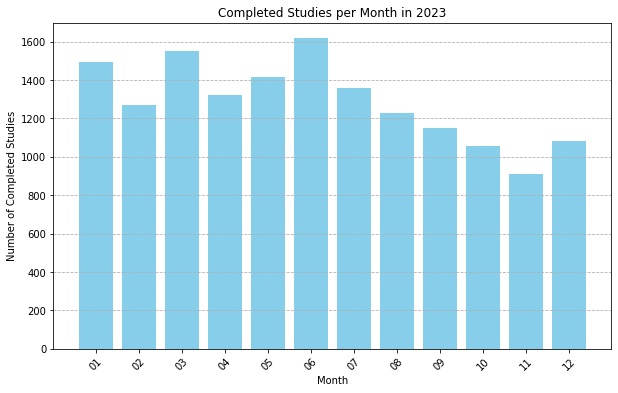

In [0]:
# Filtering completed studies, extracting only the month from the completion date
completed_studies_2023_rdd = Cleaned_Clinical_rdd_2023.filter(
    lambda x: len(x) > 13 and x[3] == 'COMPLETED' and x[13].startswith('2023')
).map(
    lambda x: (x[13][5:7], 1)  # Extract MM format
).reduceByKey(
    lambda a, b: a + b
).sortByKey()

# Collecting the monthly counts of completed studies in 2023 into a list
monthly_counts = completed_studies_2023_rdd.collect()

# Unpack the months and counts
months, counts = zip(*monthly_counts)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Completed Studies per Month in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [0]:
# Table for all values in each month
print("Number Of Completed Studies For Each Month In 2023:")
print("-" * 50) # Print a separator
print(f"{'Month':<10} | {'Completed Studies'}")
print("-" * 30) # Print a separator

# Print each row of the table
for month, count in zip(months, counts):
    print(f"{month:<10} | {count}")

Number Of Completed Studies For Each Month In 2023:
--------------------------------------------------
Month      | Completed Studies
------------------------------
01         | 1494
02         | 1272
03         | 1552
04         | 1324
05         | 1415
06         | 1619
07         | 1360
08         | 1230
09         | 1152
10         | 1058
11         | 909
12         | 1082


### No. 6

Top 5 Pharmaceutical Companies with the Most Clinical Trials for Diabetes Mellitus:
1. Sanofi: 6748 trials
2. Pfizer: 6106 trials
3. AstraZeneca: 5232 trials
4. GlaxoSmithKline: 4690 trials
5. Boehringer Ingelheim: 1848 trials


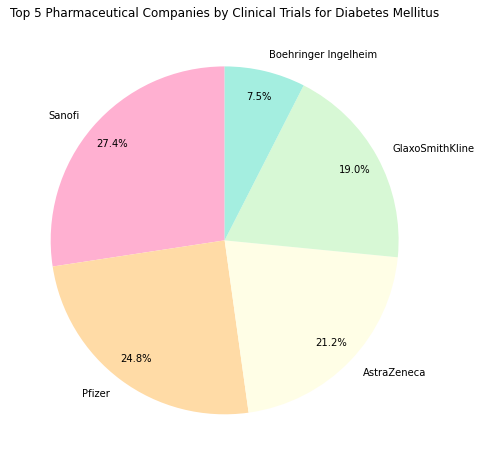

In [0]:
# Filter Clinical Trials for "Diabetes Mellitus"
conditions_column_index = header_Clinical_rdd_2023.index('Conditions')
diabetes_trials = Cleaned_Clinical_rdd_2023.filter(
    lambda row: "Diabetes Mellitus" in row[conditions_column_index]
)

# Join with Pharmaceutical Companies Data
clinical_trials_by_sponsor = diabetes_trials.map(lambda row: (row[6], row))
pharma_by_company_index = header_Pharma_rdd.index('Parent_Company')
pharma_by_company = Cleaned_Pharma_rdd.map(lambda row: (row[pharma_by_company_index], row))
joined_rdd = clinical_trials_by_sponsor.join(pharma_by_company)

# Count Trials by Company
trials_count_by_company = joined_rdd.map(lambda row: (row[0], 1)).reduceByKey(lambda a, b: a + b)

# Identify Top 5 Companies
top_5_companies_for_diabetes = trials_count_by_company.sortBy(lambda x: x[1], ascending=False).take(5)

# Print the Results
print("Top 5 Pharmaceutical Companies with the Most Clinical Trials for Diabetes Mellitus:")
for idx, (company, count) in enumerate(top_5_companies_for_diabetes, start=1):
    print(f"{idx}. {company}: {count} trials")

# Plot the Results with Matplotlib (Pie Chart)
labels = [company for company, count in top_5_companies_for_diabetes]
sizes = [count for company, count in top_5_companies_for_diabetes]
colors = ['#ffb0d1', '#ffdba6', '#fffee6', '#d7f8d5', '#a4eee0'] # color pallete

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Top 5 Pharmaceutical Companies by Clinical Trials for Diabetes Mellitus')
plt.show()

In [0]:
# visualizes the average duration of clinical trials over different years, alongside a trend line (line of best fit) that indicates the overall trend in average durations across those years



# Assuming 'header_Clinical_rdd_2023', 'Cleaned_Clinical_rdd_2023' are defined and valid
def get_duration_and_year(row):
    try:
        start_date = datetime.strptime(row[header_Clinical_rdd_2023.index('Start')], '%Y-%m-%d')
        end_date = datetime.strptime(row[header_Clinical_rdd_2023.index('Completion')], '%Y-%m-%d')
        return (start_date.year, (end_date - start_date).days)
    except:
        return None

# Processing
trial_durations = Cleaned_Clinical_rdd_2023.map(get_duration_and_year).filter(lambda x: x is not None)
avg_durations_by_year = (trial_durations
                         .aggregateByKey((0, 0),
                                         lambda acc, val: (acc[0] + val, acc[1] + 1),
                                         lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))
                         .mapValues(lambda x: x[0] / x[1]))

# Output
sorted_avg_durations = avg_durations_by_year.collectAsMap()
for year, avg_duration in sorted(sorted_avg_durations.items()):
    print(f"{year}: {avg_duration} days")


1916: 38562.0 days
1968: 18536.0 days
1972: 16695.0 days
1973: 18261.5 days
1975: 14579.0 days
1976: 8943.5 days
1977: 13854.2 days
1979: 14647.0 days
1980: 10207.0 days
1981: 11655.0 days
1983: 8525.333333333334 days
1984: 11802.8 days
1985: 11412.5 days
1986: 12528.0 days
1987: 9196.333333333334 days
1988: 10676.666666666666 days
1989: 9027.545454545454 days
1990: 10056.5 days
1991: 7935.111111111111 days
1992: 9102.45 days
1993: 6816.444444444444 days
1994: 5622.260869565217 days
1995: 4990.393939393939 days
1996: 4320.569230769231 days
1997: 5630.298507462687 days
1998: 5314.0 days
1999: 5214.7663551401865 days
2000: 5016.095808383234 days
2001: 3913.4010416666665 days
2002: 3593.395 days
2003: 3357.367892976589 days
2004: 2674.936046511628 days
2005: 2537.692134831461 days
2006: 2384.1643598615915 days
2007: 2297.006359300477 days
2008: 2327.6005326231693 days
2009: 2174.9977973568284 days
2010: 2211.548984995587 days
2011: 2061.8144252441775 days
2012: 2047.0118273211117 days
201

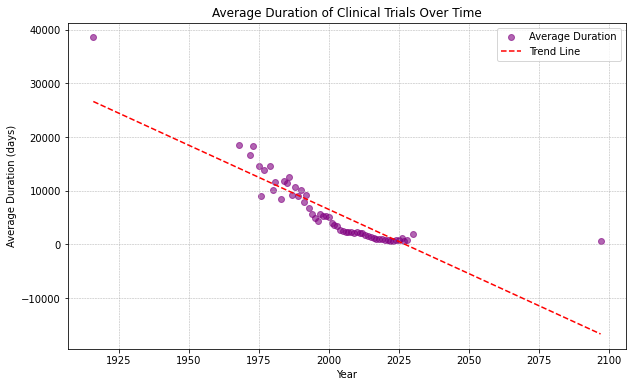

In [0]:
# visualizes the average duration of clinical trials over different years, alongside a trend line (line of best fit) that indicates the overall trend in average durations across those years



import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sorted_average_durations' is available with year as keys and average duration as values
years = sorted(sorted_avg_durations.keys())
average_durations = [sorted_avg_durations[year] for year in years]

# Convert years and durations to numpy arrays for calculations
years_array = np.array(years)
durations_array = np.array(average_durations)

# Calculating the line of best fit
slope, intercept = np.polyfit(years_array, durations_array, 1)
line_of_best_fit = slope * years_array + intercept

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, average_durations, color='purple', alpha=0.6, label='Average Duration')

# Plotting the line of best fit
plt.plot(years_array, line_of_best_fit, color='red', linestyle='--', label='Trend Line')

# Adding titles, labels, and legend
plt.title('Average Duration of Clinical Trials Over Time')
plt.xlabel('Year')
plt.ylabel('Average Duration (days)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.show()

### Extra Features

### Resuasble Code for 2020 & 2023
###### This series of codes and functions below can load, clean and analyze data for any year inputed (I.e 2020 or 2021)

In [0]:
# Configuration
def get_dataset_config(year):
    dataset_configs = {
        '2020': {
            'delimiter': '|',
            'remove_quotes': True,
            'fill_missing': True  # Fill in missing fields for 2020 data
        },
        '2021': {
            'delimiter': '|',
            'remove_quotes': True,
            'fill_missing': True  # Fill in missing fields for 2021 data
        },
    }
    return dataset_configs.get(str(year), {})

In [0]:
# Function for cleaning
def clean_rdd_20_21(rdd, delimiter='|', remove_quotes=True, fill_missing=False):
    if remove_quotes:
        rdd = rdd.map(lambda line: line.replace('"', ''))
    
    def process_row(row):
        fields = row.split(delimiter)
        if fill_missing:
            fields += ['NA'] * (num_fields - len(fields))
        processed_fields = [field if field.strip() else 'NA' for field in fields]    
        return processed_fields

    header = rdd.first()
    num_fields = len(header.split(delimiter))
    
    clean_rdd = rdd.filter(lambda x: x != header).map(process_row)

    return clean_rdd, header.split(delimiter)

In [0]:
# Function to load the cleaned data
def load_and_clean_pharma_data(file_path):
    Pharma_rdd = sc.textFile(file_path)
    Cleaned_Pharma_rdd = Pharma_rdd.map(lambda line: next(csv.reader(StringIO(line.replace('"', '')))))
    Cleaned_Pharma_rdd = Cleaned_Pharma_rdd \
        .map(lambda row: [item.strip('"') for item in row]) \
        .map(lambda row: ['NA' if value is None or value == '' else value for value in row])
    header_Pharma_rdd = Cleaned_Pharma_rdd.first()
    Cleaned_Pharma_rdd = Cleaned_Pharma_rdd.filter(lambda row: row != header_Pharma_rdd)

    return Cleaned_Pharma_rdd, header_Pharma_rdd

In [0]:
def process_clinical_trials_data(year):
    # Adjusted to use the year parameter directly
    config = get_dataset_config(year)
    file_path = f"/FileStore/tables/clinicaltrial_{year}.csv"
    rdd = sc.textFile(file_path)
    cleaned_rdd, header = clean_rdd_20_21(rdd, **config)
    return cleaned_rdd, header

In [0]:
# RDD Function to answer anlysis questions 
def analysis_1_number_of_studies(cleaned_rdd, year):
    distinct_studies_count = cleaned_rdd.map(lambda x: x[0]).distinct().count()
    print(f"Number of distinct studies for {year}: {distinct_studies_count}")

def analysis_2_study_type_frequencies(cleaned_rdd, header):
    type_index = header.index("Type")
    type_frequencies = cleaned_rdd.map(lambda x: (x[type_index], 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], ascending=False).collect()
    print("Study Type Frequencies:")
    for study_type, count in type_frequencies:
        print(f"{study_type:<35} : {count}")

def analysis_3_top_conditions_excluding_na(cleaned_rdd, header):
    conditions_index = header.index("Conditions")
    top_conditions = cleaned_rdd.flatMap(lambda x: x[conditions_index].split(',')).filter(lambda x: x != 'NA').map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: x[1], ascending=False).take(5)
    print("Top 5 Conditions (excluding 'NA'):")
    for condition, frequency in top_conditions:
        print(f"{condition:<35} : {frequency}")

def analysis_4_top_non_pharma_sponsors(cleaned_rdd, header, Cleaned_Pharma_rdd, header_Pharma_rdd):
    parent_company_index = header_Pharma_rdd.index('Parent_Company')
    pharma_companies_list = Cleaned_Pharma_rdd.map(lambda x: x[parent_company_index]).distinct().collect()

    pharma_companies_broadcast = sc.broadcast(pharma_companies_list)
    sponsor_index = header.index('Sponsor')
    non_pharma_clinical_rdd = cleaned_rdd.filter(lambda row: row[sponsor_index] not in pharma_companies_broadcast.value)

    sponsors_count_rdd = non_pharma_clinical_rdd.map(lambda row: (row[sponsor_index], 1)).reduceByKey(lambda x, y: x + y)
    sponsors_count_sorted_rdd = sponsors_count_rdd.sortBy(lambda x: x[1], ascending=False)
    top_10_sponsors = sponsors_count_sorted_rdd.take(10)

    # Presentation
    print("Top 10 Non-Pharmaceutical Sponsors & Number of Clinical Trials Sponsored:")
    print(f"{'Sponsor':<50} | {'Number of Trials':>15}")  # Header
    print("-" * 68)  # Divider line for table
    for sponsor, count in top_10_sponsors:
        print(f"{sponsor:<50} | {count:>15}")


In [0]:
def analysis_5_completed_studies_by_month(cleaned_rdd, year):
    # Function to convert month names to datetime objects for sorting
    def month_to_datetime(month_name, year):
        return datetime.strptime(f'{month_name} {year}', '%b %Y')
    
    # Filtering completed studies and converting month names to datetime 
    completed_studies_year_rdd = cleaned_rdd.filter(
        lambda x: len(x) > 4 and x[2] == 'Completed' and x[4].endswith(year)
    ).map(
        lambda x: ((month_to_datetime(x[4].split()[0], year), x[4].split()[0]), 1)
    ).reduceByKey(
        lambda a, b: a + b
    ).sortByKey().map(
        lambda x: (x[0][1], x[1])  
    )

    # Collecting the monthly counts of completed studies into a list
    monthly_counts = completed_studies_year_rdd.collect()

    # Check if monthly_counts is empty
    if not monthly_counts:
        print(f"No completed studies data found for the year {year}.")
        return

    # Unpack the sorted months and counts
    months, counts = zip(*monthly_counts)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(months, counts, color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Number of Completed Studies')
    plt.title(f'Completed Studies per Month in {year}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    # Printing the values in a tabular format, now in chronological order
    print(f"\nCompleted Studies per Month in {year}:")
    print(f"{'Month':<10} | {'Number of Completed Studies'}")
    print("-" * 35)
    for month, count in monthly_counts:
        print(f"{month:<10} | {count}")

In [0]:
# Function to Insert a year 
def process_clinical_trials_data_with_input():
    available_years = ['2020', '2021']
    global cleaned_rdd, header, year_selected  # Declares as global to access them later outside this function
    year = input("Input clinical trial year (available years are 2020, 2021): ")
    if year in available_years:
        cleaned_rdd, header = process_clinical_trials_data(year)
        year_selected = year  
    else:
        print(f"The year {year} is not available. Please choose from {', '.join(available_years)}.")
        year_selected = None  # Indicate no valid year was selected

In [0]:
# Calling the function to insert a year of interest
# Insert a year "2020 or 2021"
process_clinical_trials_data_with_input()

Input clinical trial year (available years are 2020, 2021):  2020

In [0]:
# Analysis No. 1
if year_selected is not None:
    analysis_1_number_of_studies(cleaned_rdd, year_selected)
else:
    print("No year selected or data not loaded. Please run the data loading cell correctly.")

Number of distinct studies for 2020: 356466


In [0]:
# Analysis No. 2
if year_selected is not None:
    analysis_2_study_type_frequencies(cleaned_rdd, header)  
else:
    print("No year selected or data not loaded. Please run the data loading cell correctly.")

Study Type Frequencies:
Interventional                      : 277631
Observational                       : 71434
Observational [Patient Registry]    : 7332
Expanded Access                     : 69


In [0]:
# Analysis No. 3
if year_selected is not None:
    analysis_3_top_conditions_excluding_na(cleaned_rdd, header)  
else:
    print("No year selected or data not loaded. Please run the data loading cell correctly.")

Top 5 Conditions (excluding 'NA'):
Carcinoma                           : 12245
Diabetes Mellitus                   : 10425
Neoplasms                           : 8534
Breast Neoplasms                    : 8009
Syndrome                            : 7419


In [0]:
# Analysis No. 4
if year_selected is not None:
    # Pass all required arguments to the function
    analysis_4_top_non_pharma_sponsors(cleaned_rdd, header, Cleaned_Pharma_rdd, header_Pharma_rdd)
else:
    print("No year selected or data not loaded. Please run the data loading cell correctly.")

Top 10 Non-Pharmaceutical Sponsors & Number of Clinical Trials Sponsored:
Sponsor                                            | Number of Trials
--------------------------------------------------------------------
National Cancer Institute (NCI)                    |            3100
M.D. Anderson Cancer Center                        |            2238
Merck Sharp & Dohme Corp.                          |            2184
Mayo Clinic                                        |            2097
Assistance Publique - Hôpitaux de Paris            |            2043
Novartis Pharmaceuticals                           |            1962
Massachusetts General Hospital                     |            1823
Assiut University                                  |            1806
Hoffmann-La Roche                                  |            1761
National Taiwan University Hospital                |            1720


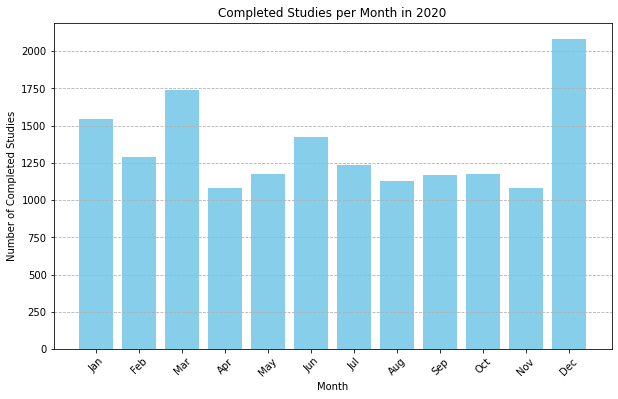


Completed Studies per Month in 2020:
Month      | Number of Completed Studies
-----------------------------------
Jan        | 1544
Feb        | 1286
Mar        | 1740
Apr        | 1080
May        | 1176
Jun        | 1424
Jul        | 1237
Aug        | 1126
Sep        | 1167
Oct        | 1176
Nov        | 1078
Dec        | 2084


In [0]:
# Analysis No. 5
if year_selected is not None:
    analysis_5_completed_studies_by_month(cleaned_rdd, year_selected)
else:
    print("No year selected or data not loaded. Please run the data loading cell correctly.")